In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopy.distance
! pip install reverse_geocode
import reverse_geocode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_pairs = pd.read_csv("pairs.csv")


In [ ]:
#Converting all the strings values to lower case
def fun_lower(df):
  for c in df.columns:
    df[c] = df[c].fillna('').astype(str).apply(lambda x: x.lower())

fun_lower(df_train)
fun_lower(df_pairs)
fun_lower(df_test)

In [ ]:
def missing(df):
  for c in df.columns:
    df[c] = df[c].replace("", np.nan)

missing(df_train)
missing(df_test)
missing(df_pairs)

In [ ]:
#Converting all object columns to category
def obj_to_cat(df):
  for i in df.columns:
    if df[i].dtype == "O":
      df[i] = df[i].astype('category')
obj_to_cat(df_train)
obj_to_cat(df_pairs)
obj_to_cat(df_test)

In [ ]:
df_test["zip"] = df_test["zip"].astype('category')
df_test["phone"] = df_test["phone"].astype('category')

In [ ]:
df_pairs.head(3)

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,e_000001272c6c5d,café stad oudenaarde,50.85997533509319,3.6341963487748346,abdijstraat,nederename,oost-vlaanderen,9700,be,NaN,...,3.635206,NaN,NaN,NaN,NaN,be,NaN,NaN,bars,true
1,e_000008a8ba4f48,turkcell,37.84451021530735,27.84420157619721,adnan menderes bulvarı,NaN,NaN,NaN,tr,NaN,...,27.84556,batı aydın,aydın,NaN,67500,tr,NaN,NaN,electronics stores,false
2,e_000023d8f4be44,island spa,14.518969876756294,121.01870186448409,"5th flr, newport mall, resorts world manila",pasay city,metro manila,NaN,ph,NaN,...,121.01982745051409,NaN,NaN,NaN,NaN,ph,NaN,NaN,spas,true


In [ ]:
df_train.head(3)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,e_000001272c6c5d,café stad oudenaarde,50.85997533509319,3.6341963487748346,abdijstraat,nederename,oost-vlaanderen,9700,be,NaN,NaN,bars,p_677e840bb6fc7e
1,e_000002eae2a589,carioca manero,-22.907225306597013,-43.17824390023254,NaN,NaN,NaN,NaN,br,NaN,NaN,brazilian restaurants,p_d82910d8382a83
2,e_000007f24ebc95,ร้านตัดผมการาเกด,13.780813251617689,100.48489995223518,NaN,NaN,NaN,NaN,th,NaN,NaN,salons / barbershops,p_b1066599e78477


In [ ]:
df_test.head(3)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories
0,e_00001118ad0191,jamu petani bagan serai,5.012169,100.535805,NaN,NaN,NaN,NaN,my,NaN,NaN,cafés
1,e_000020eb6fed40,johnny's bar,40.43420889065938,-80.56416034698486,497 n 12th st,weirton,wv,26062.0,us,NaN,NaN,bars
2,e_00002f98667edf,qiwi,47.215134,39.686088,"межевая улица, 60",ростов-на-дону,NaN,NaN,ru,https://qiwi.com,78003011131.0,atms


In [ ]:
(df_test.isna().sum()/len(df_test))*100

id             0.0
name           0.0
latitude       0.0
longitude      0.0
address       40.0
city          40.0
state         60.0
zip           60.0
country        0.0
url           80.0
phone         80.0
categories     0.0
dtype: float64

In [ ]:
(df_train.isnull().sum()/len(df_train))*100

id                    0.000000
name                  0.000088
latitude              0.000000
longitude             0.000000
address              34.827610
city                 26.272027
state                36.931996
zip                  52.284837
country               0.000966
url                  76.490940
phone                69.893626
categories            8.632417
point_of_interest     0.000000
dtype: float64

In [ ]:
(df_pairs.isnull().sum()/len(df_pairs))*100

id_1             0.000000
name_1           0.000000
latitude_1       0.000000
longitude_1      0.000000
address_1       17.882665
city_1          11.397167
state_1         21.867243
zip_1           37.898661
country_1        0.001382
url_1           59.957990
phone_1         53.356584
categories_1     2.814614
id_2             0.000000
name_2           0.000000
latitude_2       0.000000
longitude_2      0.000000
address_2       46.019482
city_2          36.520028
state_2         46.504534
zip_2           61.163537
country_2        0.001036
url_2           85.343069
phone_2         79.450413
categories_2    13.124042
match            0.000000
dtype: float64

In [ ]:
def get_country_codes(coords):
    data = reverse_geocode.search(coords)
    return [v['country_code'] for v in data]

df_train['country_code'] = get_country_codes(df_train[['latitude', 'longitude']])

df_pairs['country_code_1'] = get_country_codes(df_pairs[['latitude_1', 'longitude_1']])
df_pairs['country_code_2'] = get_country_codes(df_pairs[['latitude_2', 'longitude_2']])

print(f'Unique Country Code 1 in Pairs: {df_pairs["country_code_1"].nunique()}\n')
print('===== Top 10 Most Occuring Country Codes 1 =====')
display(df_pairs['country_code_1'].value_counts(dropna=False).head(10))

Unique Country Code 1 in Pairs: 214

===== Top 10 Most Occuring Country Codes 1 =====


US    116083
ID     68439
TR     61462
JP     34219
TH     31619
RU     30023
MY     26713
BR     23812
BE     12543
PH     12153
Name: country_code_1, dtype: int64

In [ ]:
def get_cities(coords):
    data = reverse_geocode.search(coords)
    return [v['city'] for v in data]

df_train['city_rg'] = get_cities(df_train[['latitude', 'longitude']])
    
df_pairs['city_rg_1'] = get_cities(df_pairs[['latitude_1', 'longitude_1']])
df_pairs['city_rg_2'] = get_cities(df_pairs[['latitude_2', 'longitude_2']])

print(f'Unique City Reverse Geocode 1 in Pairs: {df_pairs["city_rg_1"].nunique()}\n')
print('===== Top 10 Most Occuring City Reverse Geocode 1 =====')
display(df_pairs['city_rg_1'].value_counts(dropna=False).head(10))

Unique City Reverse Geocode 1 in Pairs: 31318

===== Top 10 Most Occuring City Reverse Geocode 1 =====


Jakarta          13635
Singapore         8969
Tokyo             7500
Bandung           7002
Kuala Lumpur      5898
Gramercy Park     3214
Riyadh            2607
Yongsan-dong      2594
São Paulo         2493
Medan             2460
Name: city_rg_1, dtype: int64

In [ ]:
print(df_train["country_code"].isna().sum())
print(df_train["city_rg"].isna().sum())

0
0


In [ ]:
df_train['country_code'] = df_train['country_code'].str.lower()
df_train['city_rg'] = df_train['city_rg'].str.lower()
df_pairs['country_code_1'] = df_pairs['country_code_1'].str.lower()
df_pairs['country_code_2'] = df_pairs['country_code_2'].str.lower()
df_pairs['city_rg_1'] = df_pairs['city_rg_1'].str.lower()
df_pairs['city_rg_2'] = df_pairs['city_rg_2'].str.lower()

In [ ]:
obj_to_cat(df_train)
obj_to_cat(df_pairs)

In [ ]:
(df_pairs.isna().sum()/len(df_pairs))*100

id_1               0.000000
name_1             0.000000
latitude_1         0.000000
longitude_1        0.000000
address_1         17.882665
city_1            11.397167
state_1           21.867243
zip_1             37.898661
country_1          0.001382
url_1             59.957990
phone_1           53.356584
categories_1       2.814614
id_2               0.000000
name_2             0.000000
latitude_2         0.000000
longitude_2        0.000000
address_2         46.019482
city_2            36.520028
state_2           46.504534
zip_2             61.163537
country_2          0.001036
url_2             85.343069
phone_2           79.450413
categories_2      13.124042
match              0.000000
country_code_1     0.000000
country_code_2     0.000000
city_rg_1          0.000000
city_rg_2          0.000000
dtype: float64

In [ ]:
from pandas.api.types import union_categoricals

union = union_categoricals([df_train.country_code, df_train.country]).categories

df_train['country_code'] = df_train.country_code.cat.set_categories(union)
df_train['country'] = df_train.country.cat.set_categories(union)

In [ ]:
df_train['is_equal'] = (df_train['country_code'] == df_train['country'])

In [ ]:
df_train["is_equal"].unique()

array([ True, False])

In [ ]:
result_df = df_train[df_train["is_equal"] == False]

In [ ]:
result_df.head(10)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,country_code,city_rg,is_equal
36,e_00028abacfbca0,mill street brew,41.50697708129883,-83.14706420898438,169 mill street,oak harbor,oh,43449,us,NaN,4197070681,coffee shops,p_9fc94843d5dbcd,ca,amherstburg,False
270,e_00101807de9e99,chalet alabkal,28.63567538271121,48.39047312736511,NaN,NaN,NaN,NaN,kw,NaN,NaN,beaches,p_24639ebb65653a,sa,al khafjī,False
336,e_0014138afddd16,kohong blk 153 bukit batok st 11 #01-294,1.347253,103.74446956666668,NaN,NaN,NaN,NaN,sg,NaN,NaN,spas,p_7248a7e10a8cac,my,johor bahru,False
344,e_001499ba58ab09,blk 326 yishun ring,1.428799,103.840309,yishun ring road,singapore,singapore,NaN,sg,NaN,NaN,NaN,p_e7dcd2f4ba1489,my,kampung pasir gudang baru,False
380,e_001750bd8a2e4e,yes,-28.906755,88.559074,NaN,NaN,NaN,NaN,xx,NaN,NaN,NaN,p_6541223767ada1,cc,west island,False
476,e_001d7e7fd121cc,autofficina carli,45.591038,13.805947,"via martinelli, 4",muggia,ts,34015,it,NaN,+390409235136,"gas stations, automotive shops",p_9d884f7ba3c2a9,si,spodnje škofije,False
507,e_001f3bcb2310e9,buffalo marathon,42.889294,-78.877203,w huron st,buffalo,ny,14202,us,NaN,NaN,other events,p_95ebc362234c61,ca,fort erie,False
989,e_003c18f3788ed2,subway,42.31590854308647,-83.22375297546387,fc-309,dearborn,mi,48126,us,https://restaurants.subway.com/united-states/m...,3134250000,"sandwich places, fast food restaurants, restau...",p_9f0a879c679347,ca,windsor,False
1053,e_003fed8ca33538,verizon authorized retailer - wireless zone,41.65404926942192,-83.6215401515392,1440 secor rd.,toledo,oh,43607,us,https://shop.wirelesszone.com/oh/toledo/1440-s...,+14195311444,"mobile phone shops, electronics stores",p_d24e3cb8430f3f,ca,amherstburg,False
1143,e_0044e28f74a2e2,united isd natatorium,27.573575705091315,-99.48006678117332,NaN,laredo,tx,NaN,us,NaN,NaN,"pools, swim schools",p_4c36571b77efb8,mx,nuevo laredo,False


In [ ]:
df_train.isna().sum()

id                        0
name                      1
latitude                  0
longitude                 0
address              396621
city                 299189
state                420586
zip                  595426
country                  11
url                  871088
phone                795957
categories            98307
point_of_interest         0
country_code              0
city_rg                   0
is_equal                  0
dtype: int64

In [ ]:
df_train.head(10)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,country_code,city_rg,is_equal
0,e_000001272c6c5d,café stad oudenaarde,50.85997533509319,3.6341963487748346,abdijstraat,nederename,oost-vlaanderen,9700,be,NaN,NaN,bars,p_677e840bb6fc7e,be,oudenaarde,True
1,e_000002eae2a589,carioca manero,-22.907225306597013,-43.17824390023254,NaN,NaN,NaN,NaN,br,NaN,NaN,brazilian restaurants,p_d82910d8382a83,br,rio de janeiro,True
2,e_000007f24ebc95,ร้านตัดผมการาเกด,13.780813251617689,100.48489995223518,NaN,NaN,NaN,NaN,th,NaN,NaN,salons / barbershops,p_b1066599e78477,th,bangkok noi,True
3,e_000008a8ba4f48,turkcell,37.84451021530735,27.84420157619721,adnan menderes bulvarı,NaN,NaN,NaN,tr,NaN,NaN,mobile phone shops,p_b2ed86905a4cd3,tr,aydın,True
4,e_00001d92066153,restaurante casa cofiño,43.338196,-4.326821,NaN,caviedes,cantabria,NaN,es,NaN,NaN,spanish restaurants,p_809a884d4407fb,es,comillas,True
5,e_000023d8f4be44,island spa,14.518969876756294,121.01870186448409,"5th flr, newport mall, resorts world manila",pasay city,metro manila,NaN,ph,NaN,NaN,spas,p_020de174484ec6,ph,pasay,True
6,e_00002a131a2bf6,ministry of youth,29.36435235908348,47.97136230015956,NaN,NaN,NaN,NaN,kw,NaN,NaN,capitol buildings,p_9e4e64be602c35,kw,kuwait city,True
7,e_0000764d65557e,mcdonald's,-7.265894412994385,112.74938201904295,"plaza surabaya, pemuda building",NaN,NaN,NaN,id,NaN,NaN,fast food restaurants,p_be89c778befb23,id,gubengairlangga,True
8,e_00007dcd2bb53f,togo's sandwiches,38.25779696430681,-122.06459937900875,"1380 holiday ln., ste. b",fairfield,ca,94534,us,https://locations.togos.com/ll/us/ca/fairfield...,7074394747,sandwich places,p_aae7505da98d46,us,fairfield,True
9,e_0000890af22ff5,flohmarkt am rathaus steglitz,52.4570449854665,13.32247549214842,NaN,NaN,NaN,NaN,de,NaN,NaN,flea markets,p_b6bbe6a8990f34,de,steglitz,True


In [ ]:
#df_train.drop(["zip", "url","phone"], axis=1)

In [ ]:
#df_train.fillna("unknown")

In [ ]:
#df_pairs = df_pairs.drop(["zip_1", "url_1", "phone_1", "zip_2", "url_2", "phone_2"], axis=1)

In [ ]:
#df_pairs = df_pairs.fillna("Unknown")

In [ ]:
# Most common names are fast food restaurants
print(f'Unique Names in Train: {df_train["name"].nunique()}\n')
print('===== Top 10 Most Occuring Names =====')
display(df_train['name'].value_counts(dropna=False, normalize=True).head(10))

Unique Names in Train: 817308

===== Top 10 Most Occuring Names =====


starbucks             0.005003
mcdonald's            0.003026
redbox                0.002808
subway                0.002441
7-eleven              0.001788
payless shoesource    0.001719
kfc                   0.001581
burger king           0.001323
shell                 0.001149
pizza hut             0.000947
Name: name, dtype: float64

In [ ]:
#Splitting the pairs data
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
df_pairs_train, df_pairs_test = train_test_split(df_pairs, test_size=0.2, random_state=10)

In [ ]:
df_pairs_train.shape

(463125, 29)

In [ ]:
df_pairs_test.shape

(115782, 29)

In [ ]:
df_pairs_train['match'].value_counts()

true     318841
false    144284
Name: match, dtype: int64

In [ ]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

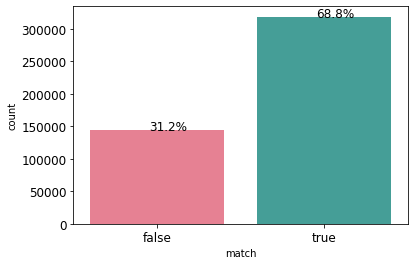

In [ ]:
ax = sns.countplot(x="match", palette="husl", data=df_pairs_train)
plt.xticks(size = 12)
plt.yticks(size = 12)
without_hue(ax, df_pairs_train.match)

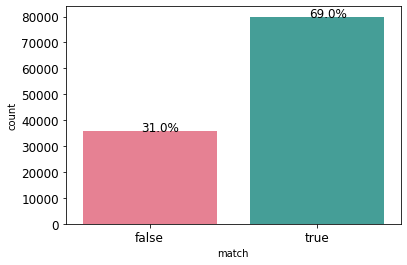

In [ ]:
ax = sns.countplot(x="match", palette="husl", data=df_pairs_test)
plt.xticks(size = 12)
plt.yticks(size = 12)
without_hue(ax, df_pairs_test.match)